In [4]:
!pip install matplotlib seaborn plotly scikit-learn openpyxl

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/6f/d3/a4bbc01c237ab710a1f22b4da72f4ff6d77eb4c7735ea9811a94ae239067/matplotlib-3.10.8-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/52.8 kB ? eta -:--:--
     ------- -------------------------------- 10.2/52.8 kB ? eta -:--:--
     ------- -------------------------------- 10.2/52.8 kB ? eta -:--:--
     ------- -------------------------------- 10.2/52.8 kB ? eta -:--:--
     ------- -------------------------------- 10.2/52.8 kB ? eta -:--:--
     ------- -------------------------------- 10.2/52.8 kB ? eta -:--:--
     ----------------------------- -------- 41.0/52.8 kB 140.3 kB/s eta 0:00:01
     ----------------------------- -------- 41.0/52.8 kB 140.3 kB/s eta 0:00:01
     ----------------------------- -------- 41.0/52.8 kB 140.3 kB/s eta 0:00:01
     ----------------------------- -------- 41.0/52.8 kB 140.3 kB/s eta 0:00:01
     -----------------------


[notice] A new release of pip is available: 23.2.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report

sns.set_style("whitegrid")


In [6]:
file_path = "../data/data.xlsx"

df = pd.read_excel(file_path, sheet_name=0)

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,Spain
1,1,1961,Graduation,Single,57091,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,Canada
2,10476,1958,Graduation,Married,67267,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,USA
3,1386,1967,Graduation,Together,32474,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,Australia
4,5371,1989,Graduation,Single,21474,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,Spain


In [7]:
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4    Income              2240 non-null   int64         
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,51687.459375,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
min,0.000000,1893.000000,0.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,34722.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51075.000000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,3246.662198,11.984069,25609.342730,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391


In [8]:
df.drop_duplicates(inplace=True)


In [9]:
df["Age"] = 2026 - df["Year_Birth"]

df["Total_Spending"] = (
    df["MntWines"]
    + df["MntFruits"]
    + df["MntMeatProducts"]
    + df["MntFishProducts"]
    + df["MntSweetProducts"]
    + df["MntGoldProds"]
)


In [10]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])


In [11]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [12]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Age,Total_Spending
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,51687.459375,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375,57.194196,605.798214
min,0.000000,1893.000000,0.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,5.000000
25%,2828.250000,1959.000000,34722.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,49.000000,68.750000
50%,5458.500000,1970.000000,51075.000000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,396.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000,1045.500000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,133.000000,2525.000000
std,3246.662198,11.984069,25609.342730,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391,11.984069,602.249288


In [18]:
print(df.columns.tolist())


['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Age', 'Total_Spending']


In [19]:
df[["Age", " Income "]].describe()

,Age,Income
count,2240.000000,2240.000000
mean,57.194196,51687.459375
std,11.984069,25609.342730
min,30.000000,0.000000
25%,49.000000,34722.000000
50%,56.000000,51075.000000
75%,67.000000,68289.750000
max,133.000000,666666.000000


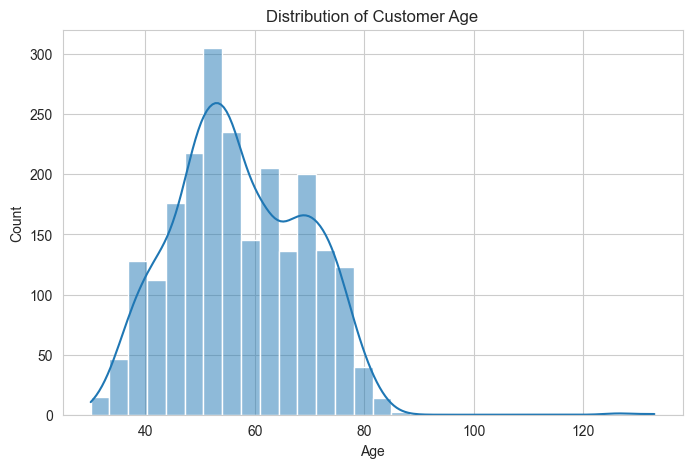

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Distribution of Customer Age")
plt.show()

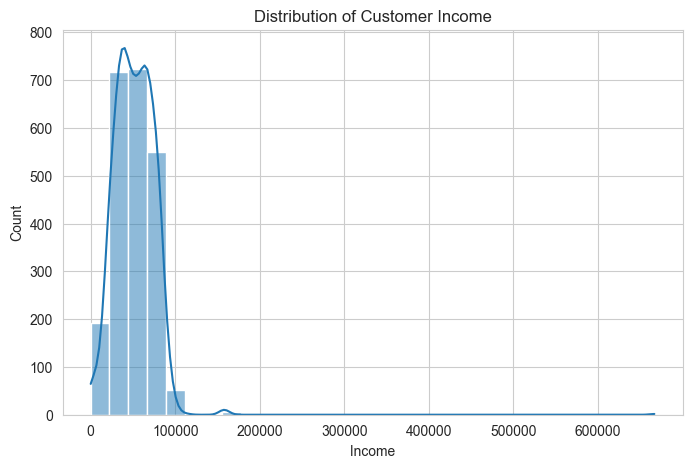

In [22]:
plt.figure(figsize=(8,5))
sns.histplot(df[' Income '], bins=30, kde=True)
plt.title("Distribution of Customer Income")
plt.show()

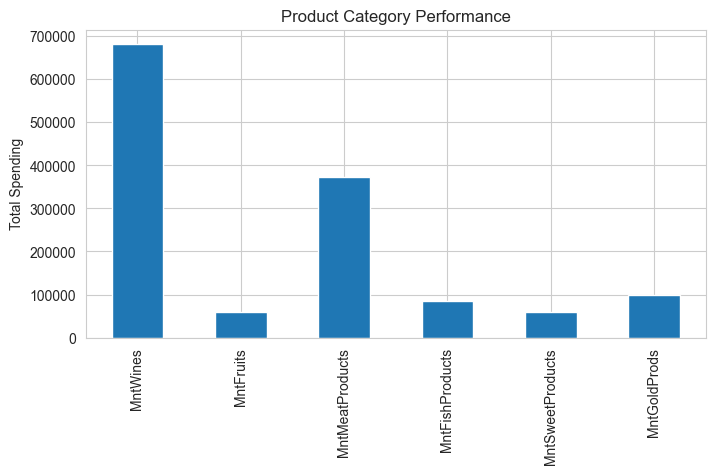

In [23]:
product_cols = [
    "MntWines","MntFruits","MntMeatProducts",
    "MntFishProducts","MntSweetProducts","MntGoldProds"
]

df[product_cols].sum().plot(kind="bar", figsize=(8,4))
plt.title("Product Category Performance")
plt.ylabel("Total Spending")
plt.show()

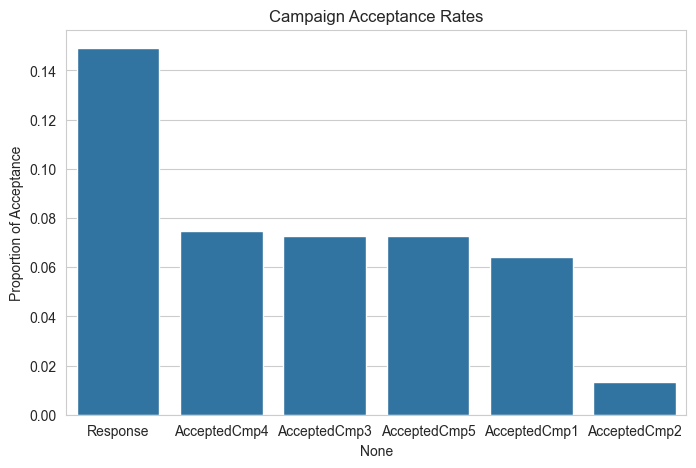

In [26]:
# 6. Campaign Response Analysis
# ===============================
campaign_cols = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']

# Plot proportion of accepted campaigns
campaign_summary = df[campaign_cols].mean().sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=campaign_summary.index, y=campaign_summary.values)
plt.ylabel("Proportion of Acceptance")
plt.title("Campaign Acceptance Rates")
plt.show()

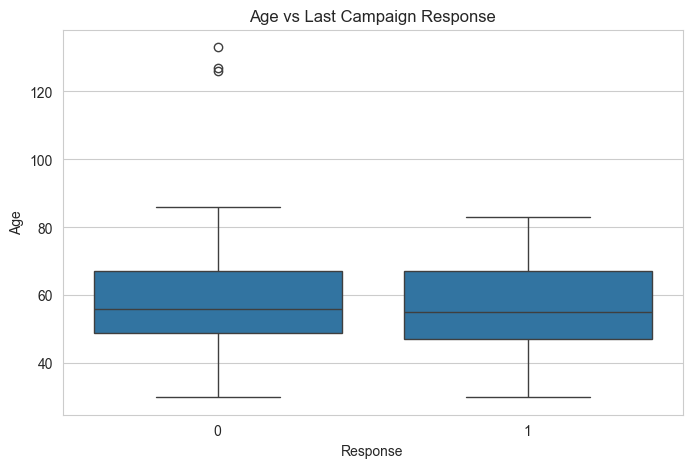

In [27]:
# 7. Relationship Between Customer Characteristics and Campaign Response
# ===============================
# Age vs Response
plt.figure(figsize=(8,5))
sns.boxplot(x='Response', y='Age', data=df)
plt.title("Age vs Last Campaign Response")
plt.show()

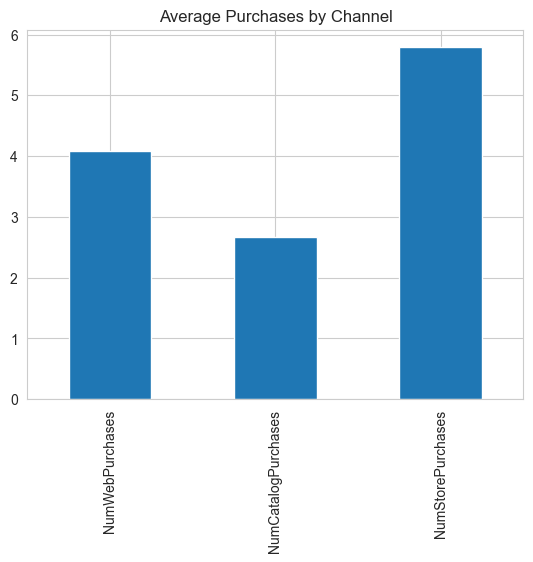

In [25]:
channel_cols = [
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases"
]

df[channel_cols].mean().plot(kind="bar")
plt.title("Average Purchases by Channel")
plt.show()
